In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import radians, sin, cos, sqrt, atan2
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('.csv')
original_data = df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101280 entries, 0 to 101279
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date_time               101280 non-null  object 
 1   customer_location_long  101280 non-null  float64
 2   customer_location_lat   101280 non-null  float64
 3   branch_id               101280 non-null  int64  
 4   branch_location_long    101280 non-null  float64
 5   branch_location_lat     101280 non-null  float64
 6   order_to_deliver        99642 non-null   float64
 7   estimation              99840 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 6.2+ MB


In [3]:
df.describe()

,customer_location_long,customer_location_lat,branch_id,branch_location_long,branch_location_lat,order_to_deliver,estimation
count,101280.000000,101280.000000,101280.000000,101280.000000,101280.000000,99642.000000,99840.000000
mean,46.686933,24.730123,2367.744244,46.608452,24.797503,35.707941,35.542955
std,0.130654,0.093003,1436.804935,2.975613,1.950984,26.209141,14.919176
min,39.176063,21.543337,0.000000,-45.554493,21.412959,0.841800,-0.688899
25%,46.633289,24.683759,1095.000000,46.638299,24.694809,24.285183,25.322591
50%,46.678470,24.739814,2336.000000,46.675761,24.747345,31.507708,32.980806
75%,46.747220,24.791975,3615.250000,46.739507,24.791113,41.068946,42.674924
max,47.058380,25.094836,5010.000000,67.749289,84.715387,414.625813,133.932824


In [4]:
df.isnull().sum()

date_time                    0
customer_location_long       0
customer_location_lat        0
branch_id                    0
branch_location_long         0
branch_location_lat          0
order_to_deliver          1638
estimation                1440
dtype: int64

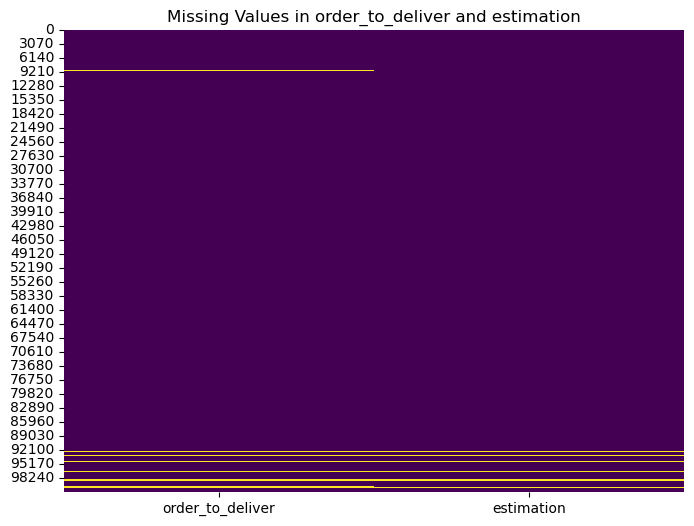

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['order_to_deliver', 'estimation']].isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in order_to_deliver and estimation')
plt.show()

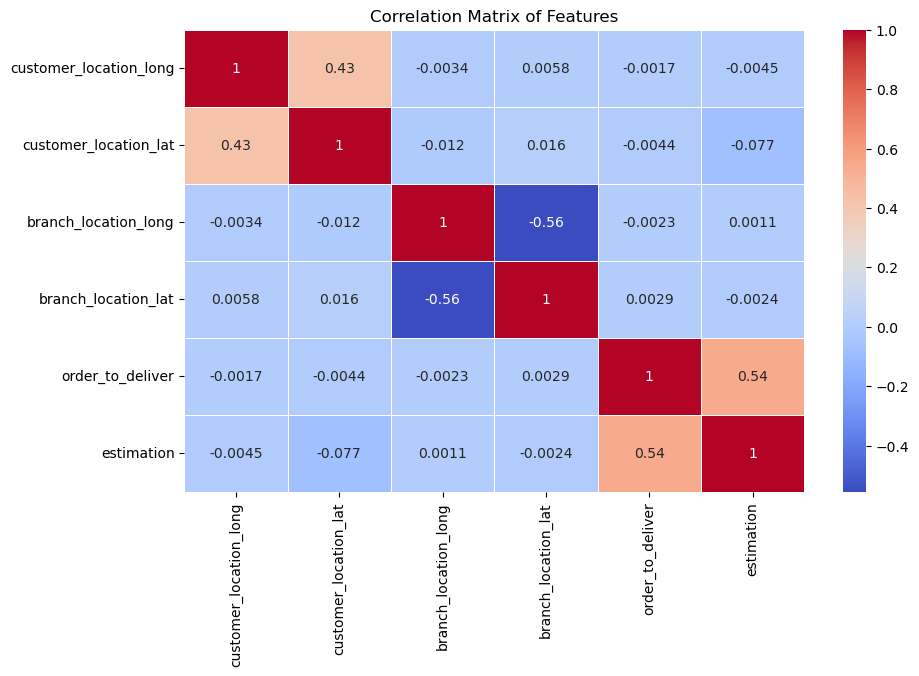

In [6]:
features = ['customer_location_long', 'customer_location_lat', 
                            'branch_location_long', 'branch_location_lat', 
                            'order_to_deliver', 'estimation']
corr_matrix = df[features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

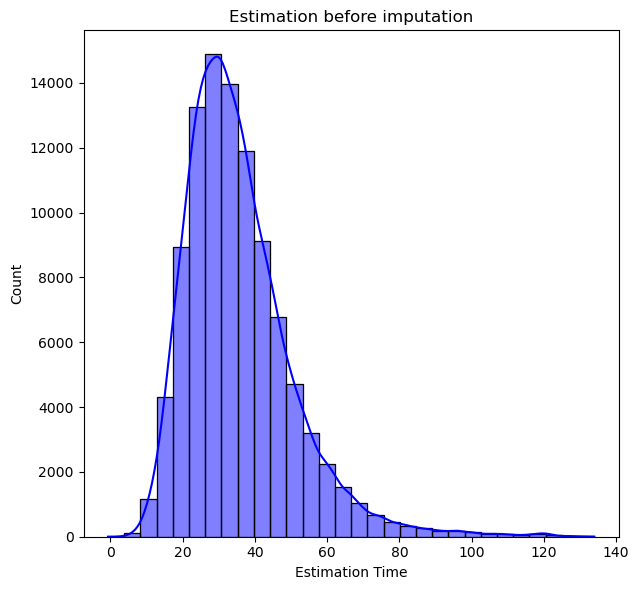

In [7]:
original_data['estimation'] = original_data['estimation'].dropna()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(original_data['estimation'], bins=30, color='blue', kde=True)
plt.title('Estimation before imputation')
plt.xlabel('Estimation Time')
plt.tight_layout()
plt.show()

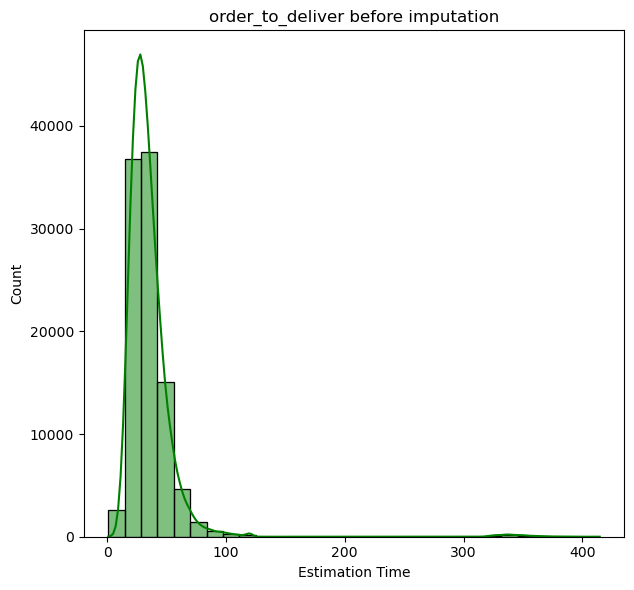

In [8]:
original_data['order_to_deliver'] = original_data['order_to_deliver'].dropna()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(original_data['order_to_deliver'], bins=30, color='Green', kde=True)
plt.title('order_to_deliver before imputation')
plt.xlabel('Estimation Time')
plt.tight_layout()
plt.show()

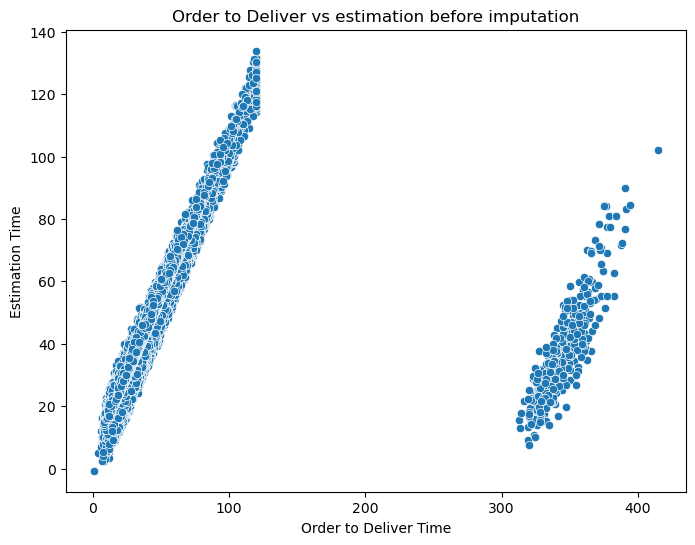

Correlation Matrix:
                   order_to_deliver  estimation
order_to_deliver          1.000000    0.539896
estimation                0.539896    1.000000


In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=original_data['order_to_deliver'], y=original_data['estimation'])
plt.title('Order to Deliver vs estimation before imputation')
plt.xlabel('Order to Deliver Time')
plt.ylabel('Estimation Time')
plt.show()

correlation = original_data[['order_to_deliver', 'estimation']].corr()
print("Correlation Matrix:\n", correlation)

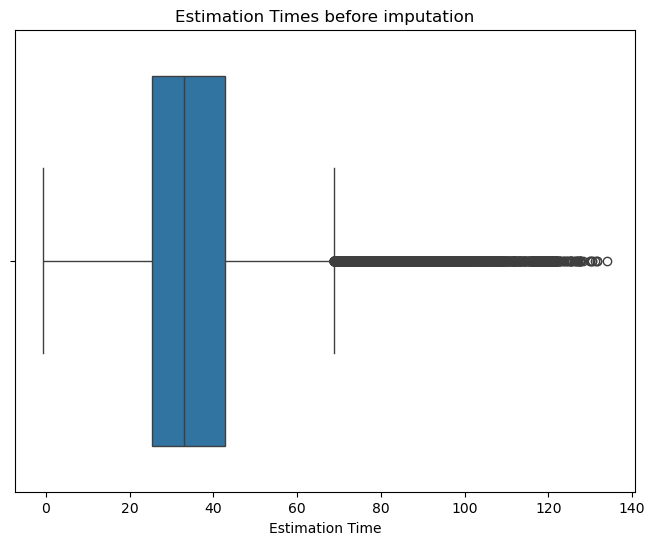

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=original_data['estimation'])
plt.title('Estimation Times before imputation')
plt.xlabel('Estimation Time')
plt.show()

In [11]:
regression_imputer = IterativeImputer(random_state=42)
data_imputed = regression_imputer.fit_transform(df[['order_to_deliver', 'estimation', 'customer_location_long', 
                                                    'customer_location_lat', 'branch_location_long', 
                                                    'branch_location_lat', 'branch_id']])

df['order_to_deliver'] = data_imputed[:, 0]
df['estimation'] = data_imputed[:, 1]

In [12]:
df.isnull().sum()

date_time                 0
customer_location_long    0
customer_location_lat     0
branch_id                 0
branch_location_long      0
branch_location_lat       0
order_to_deliver          0
estimation                0
dtype: int64

In [17]:
original_mean = original_data['estimation'].dropna().mean()
original_median = original_data['estimation'].dropna().median()
original_variance = original_data['estimation'].dropna().var()


imputed_mean = df['estimation'].mean()
imputed_median = df['estimation'].median()
imputed_variance = df['estimation'].var()

print(f'Mean before imputation {original_mean}, Mean after Imputation {imputed_mean}\n')
print(f'Median before imputation {imputed_median}, Median after Imputation {imputed_median}\n')
print(f'Variance before imputation {original_variance}, Variance after Imputation {imputed_variance}')


Mean before imputation 35.55834204577004, Mean after Imputation 35.55834204577004

Median before imputation 33.21055780206097, Median after Imputation 33.21055780206097

Variance before imputation 219.4467546926583, Variance after Imputation 219.4467546926583


In [18]:
threshold = 100
outliers = df[df['estimation'] > threshold]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 460


In [19]:
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
df['hour'] = df['date_time'].dt.hour

print(df[['date_time', 'hour']].head())

                         date_time  hour
0 2021-03-06 08:48:45.301000+00:00   8.0
1 2021-03-12 11:32:12.462000+00:00  11.0
2 2021-03-12 16:08:44.068000+00:00  16.0
3 2021-03-11 07:21:35.506000+00:00   7.0
4 2021-03-08 16:07:09.693000+00:00  16.0


In [20]:
df.isnull().sum()

date_time                 105
customer_location_long      0
customer_location_lat       0
branch_id                   0
branch_location_long        0
branch_location_lat         0
order_to_deliver            0
estimation                  0
hour                      105
dtype: int64

## The code above yielded missing values which suggest invalid entries in the date_time column itself. Since there are 105 null values I decided to drop them.

In [21]:
df = df.dropna(subset=['hour'])

In [22]:
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df = df.copy()
df.loc[:, 'time_of_day'] = df['hour'].apply(time_of_day)


In [23]:
df = df.copy()
df['error_margin'] = abs(df['order_to_deliver'] - df['estimation'])
df['high_margin_error'] = df['error_margin'] > 5


print(df[['order_to_deliver', 'estimation', 'error_margin', 'high_margin_error']].head(10))

   order_to_deliver  estimation  error_margin  high_margin_error
0         66.949150   63.616609      3.332541              False
1         30.758200   31.368778      0.610578              False
2         28.230167   29.563675      1.333509              False
3         67.180217   65.417351      1.762866              False
4         38.940733   41.470591      2.529857              False
5         28.931500   30.668501      1.737001              False
6         31.375917   30.650173      0.725743              False
7         33.748933   36.219547      2.470614              False
8         25.017900   24.690443      0.327457              False
9         45.677267   49.052447      3.375181              False


In [24]:
coords = df[['customer_location_lat', 'customer_location_long']]

kmeans = KMeans(n_clusters=5, random_state=42)
df['location_cluster'] = kmeans.fit_predict(coords)
location_group_error = df.groupby('location_cluster')['error_margin'].mean().reset_index()


print(location_group_error)

   location_cluster  error_margin
0                 0      3.721081
1                 1      5.538437
2                 2      3.140776
3                 3      5.408570
4                 4      5.234382


In [25]:
time_of_day_error = df.groupby('time_of_day')['error_margin'].mean()
time_of_day_high_error = df.groupby('time_of_day')['high_margin_error'].mean() * 100

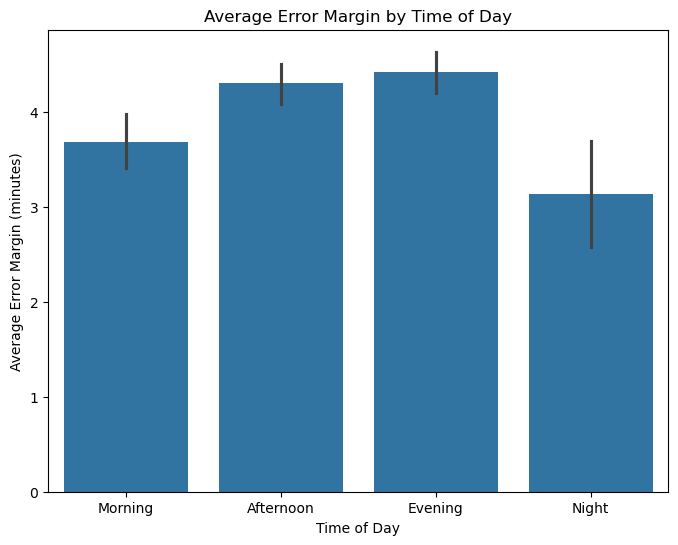

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(x='time_of_day', y='error_margin', data=df)
plt.title('Average Error Margin by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Error Margin (minutes)')
plt.show()

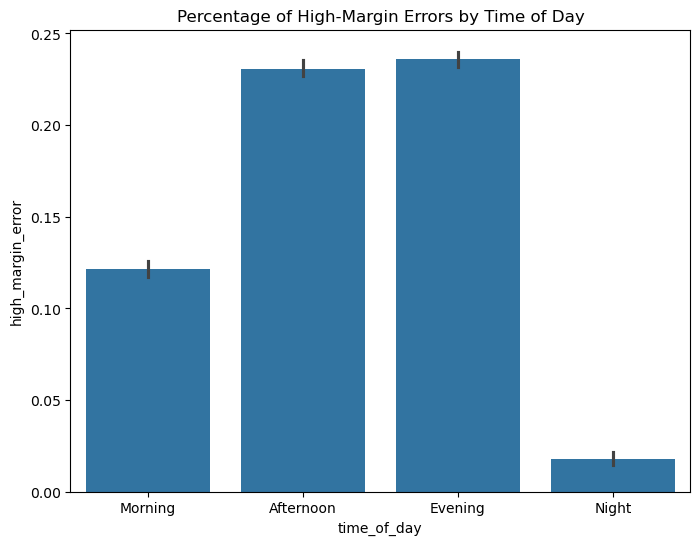

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x='time_of_day', y='high_margin_error', data=df)
plt.title('Percentage of High-Margin Errors by Time of Day')
plt.show()

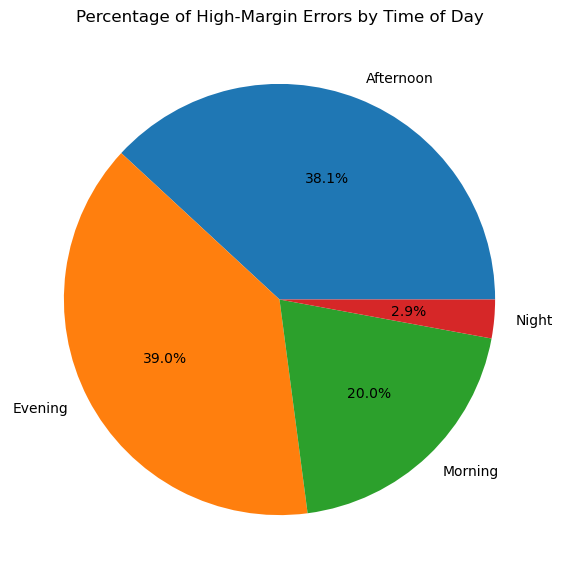

In [28]:
total_orders_by_time = df.groupby('time_of_day')['high_margin_error'].count()
high_margin_errors_by_time = df.groupby('time_of_day')['high_margin_error'].sum()
high_margin_error_percentage = (high_margin_errors_by_time / total_orders_by_time) * 100

plt.figure(figsize=(7, 7))
plt.pie(high_margin_error_percentage, labels=high_margin_errors_by_time.keys(), autopct='%1.1f%%')
plt.title('Percentage of High-Margin Errors by Time of Day')
plt.show()

In [29]:
df['high_margin_error'].value_counts()

high_margin_error
False    81000
True     20175
Name: count, dtype: int64

In [30]:
df.head(5)

,date_time,customer_location_long,customer_location_lat,branch_id,branch_location_long,branch_location_lat,order_to_deliver,estimation,hour,time_of_day,error_margin,high_margin_error,location_cluster
0,2021-03-06 08:48:45.301000+00:00,46.849771,24.672495,3071,46.814673,24.682242,66.949150,63.616609,8.0,Morning,3.332541,False,0
1,2021-03-12 11:32:12.462000+00:00,46.804409,24.724089,2358,46.778584,24.702729,30.758200,31.368778,11.0,Morning,0.610578,False,0
2,2021-03-12 16:08:44.068000+00:00,46.764247,24.811600,359,46.762715,24.809045,28.230167,29.563675,16.0,Afternoon,1.333509,False,0
3,2021-03-11 07:21:35.506000+00:00,46.605897,24.819321,4576,46.620650,24.809871,67.180217,65.417351,7.0,Morning,1.762866,False,2
4,2021-03-08 16:07:09.693000+00:00,46.637976,24.795667,164,46.621171,24.789520,38.940733,41.470591,16.0,Afternoon,2.529857,False,2


In [31]:

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0 
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    return distance


df['haversine_distance'] = df.apply(lambda row: haversine_distance(
    row['customer_location_lat'], row['customer_location_long'],
    row['branch_location_lat'], row['branch_location_long']), axis=1)

In [32]:
df['Interaction Terms'] = df['haversine_distance'] * df['hour']

In [33]:
df['Estimated Speed'] = df['haversine_distance'] / df['estimation']

In [35]:
features = ['customer_location_long', 'customer_location_lat', 'branch_location_long',
            'branch_location_lat', 'order_to_deliver', 'hour', 'location_cluster', 'haversine_distance', 'Interaction Terms', 'Estimated Speed']
X = df[features]
y = df['high_margin_error']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [36]:
rf_model = RandomForestClassifier( random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print("Random Forest Report:\n", classification_rep)


Random Forest Accuracy: 97.59%
Random Forest Report:
               precision    recall  f1-score   support

       False       0.98      0.99      0.98      8097
        True       0.95      0.93      0.94      2021

    accuracy                           0.98     10118
   macro avg       0.97      0.96      0.96     10118
weighted avg       0.98      0.98      0.98     10118



In [37]:
xgb_model = XGBClassifier(objective='binary:logistic', n_estimators=100)
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")
classification_rep = classification_report(y_test, y_pred)
print("XGBoost Report:\n", classification_rep)

XGBoost Accuracy: 98.09%
XGBoost Report:
               precision    recall  f1-score   support

       False       0.98      0.99      0.99      8097
        True       0.96      0.94      0.95      2021

    accuracy                           0.98     10118
   macro avg       0.97      0.97      0.97     10118
weighted avg       0.98      0.98      0.98     10118



In [38]:
mlp_model = MLPClassifier(max_iter=1000)
mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"MLP Accuracy: {accuracy * 100:.2f}%")
classification_rep = classification_report(y_test, y_pred)
print("MLP Report:\n", classification_rep)

MLP Accuracy: 90.89%
MLP Report:
               precision    recall  f1-score   support

       False       0.90      0.99      0.95      8097
        True       0.95      0.57      0.71      2021

    accuracy                           0.91     10118
   macro avg       0.93      0.78      0.83     10118
weighted avg       0.91      0.91      0.90     10118



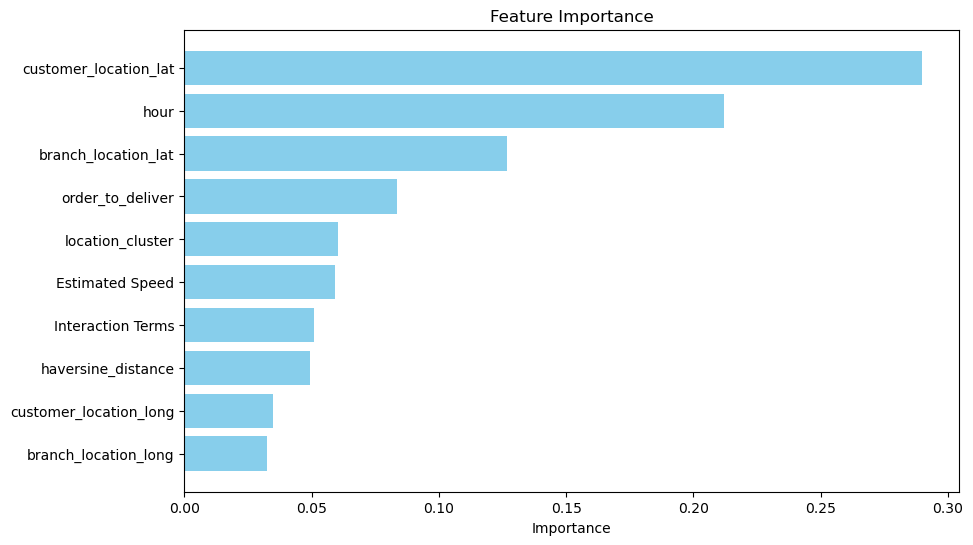

In [39]:
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()


In [40]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [0.97265539 0.97594992 0.97380704 0.97600351 0.97539948]
Average Accuracy: 0.9747630706131989
Standard Deviation: 0.0013197458386239864


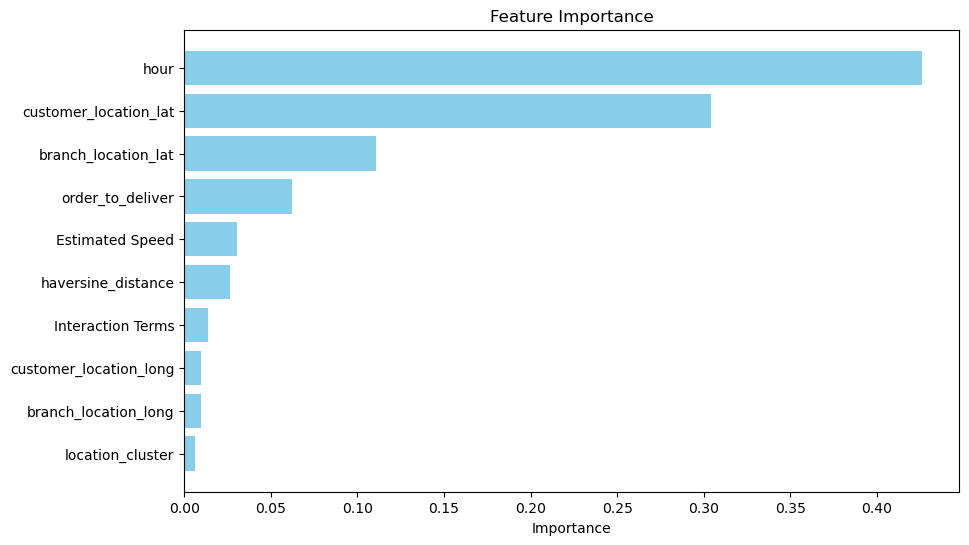

In [41]:
xgb_model.fit(X_train, y_train)

feature_importances = xgb_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()


In [42]:
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [0.98144081 0.98308807 0.98105541 0.97946296 0.98248311]
Average Accuracy: 0.9815060729352364
Standard Deviation: 0.0012521181859177263
